In [1]:
import os
import charts_function_list

In [2]:
base, data,outputs = charts_function_list.folder_setup()

In [6]:
os.chdir(data)
bad_movies = pd.read_csv('bad movies.csv')
total_scores = bad_movies['IMdB Score'].value_counts()

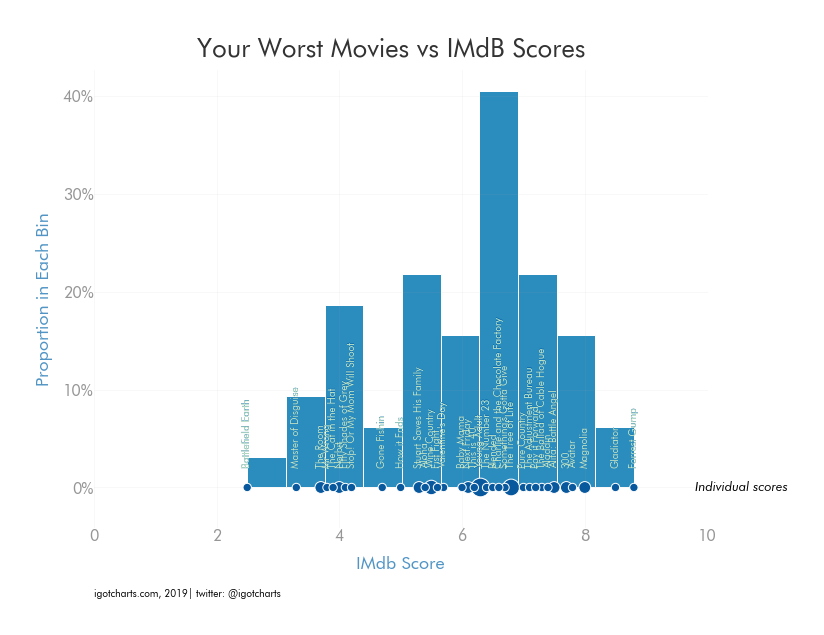

In [200]:
accent_color = "#0868ac"
bad_movies_chart = charts_function_list.chart_maker(title='Your Worst Movies vs IMdB Scores',title_size=26)
fig = bad_movies_chart.initial_fig_axis()
fig.subplots_adjust(top=.92)
ax = bad_movies_chart.axes_set_up(fig=fig)
ax.text(.98,0,'Individual scores',transform=ax.get_yaxis_transform(),va='center',style='italic',fontsize=13)
plt.scatter(y = [0 for x in total_scores], 
           x = total_scores.index,facecolor='#08589e',edgecolor='white',s=total_scores*70,zorder=2)

n,bins, histo = plt.hist(bad_movies['IMdB Score'],zorder=1,edgecolor='white',density=True,facecolor='#2b8cbe')



bad_movies_chart.tick_params_(ax)
ax.set_xlabel('IMdb Score',fontsize=18,color=accent_color,alpha=.7)
ax.set_ylabel('Proportion in Each Bin',fontsize=18,color=accent_color,alpha=.7)
yticklabels = ax.set_yticklabels(["{:,.0f}%".format(x*100) for x in ax.get_yticks()])
ax.set_xlim(0,10)

#remove duplicates that got same score for labelling purposes
bad_movies_no_duplicates = bad_movies.drop_duplicates(subset='IMdB Score').copy()


#label films
for film,score in bad_movies_no_duplicates[['Film','IMdB Score']].values:
    ax.text(score,.02,film,rotation=90,va='bottom',ha='center',color='#ccebc5',fontsize=10,zorder=2)
    ax.text(score,.02,film,rotation=90,va='bottom',ha='center',color='#0868ac',fontsize=10.1,zorder=1)
    
ax.text(0,-.15,'igotcharts.com, 2019| twitter: @igotcharts',transform=ax.transAxes)
os.chdir(outputs)
charts_function_list.chart_save('bad_movies_full_range')
#charts_function_list.chart_save('bad_movies) #use if set_xlim is commented out

### Discarded

In [ ]:

#get bins value for each data point
bad_movies['bin_value'] = np.digitize(bad_movies['IMdB Score'],bins)

#get the best and worst values in each bin
worst_in_bin = bad_movies.drop_duplicates(subset='bin_value').copy()
best_in_bin = bad_movies.sort_values(by='IMdB Score',ascending=False).drop_duplicates(subset='bin_value').copy()
worst_in_bin['type'] = 'worst'
best_in_bin['type'] = 'best'
combined_best_worst_list = pd.concat([worst_in_bin,best_in_bin]).sort_values(by=['Film','type'],ascending=False)
combined_best_worst_list = combined_best_worst_list.drop_duplicates(subset='Film').copy()
